# Franke Function 


# Ordinary Least Square (OLS)

## Without Stochastic Noise

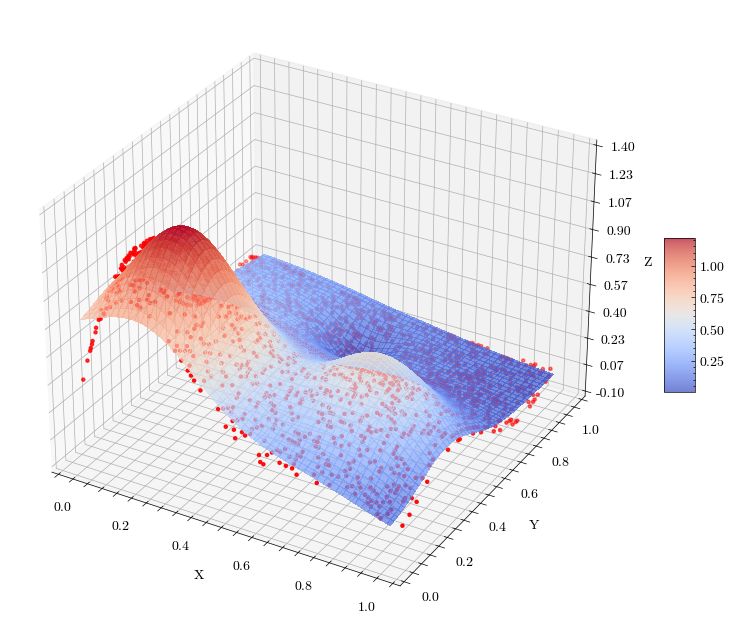

In [207]:
import miscellaneous as misc
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm  # Import cm module
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Lists to store errors and R^2 values
degree = 5
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)

# plot the results

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='r', s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_title('OLS Fit of Franke Function')
#ax.view_init(elev=30, azim=30)  # Adjust these values for different perspectives
plt.savefig('figures/franke_ols_fit_without_noise.pdf', transparent=True, bbox_inches='tight')

plt.show()

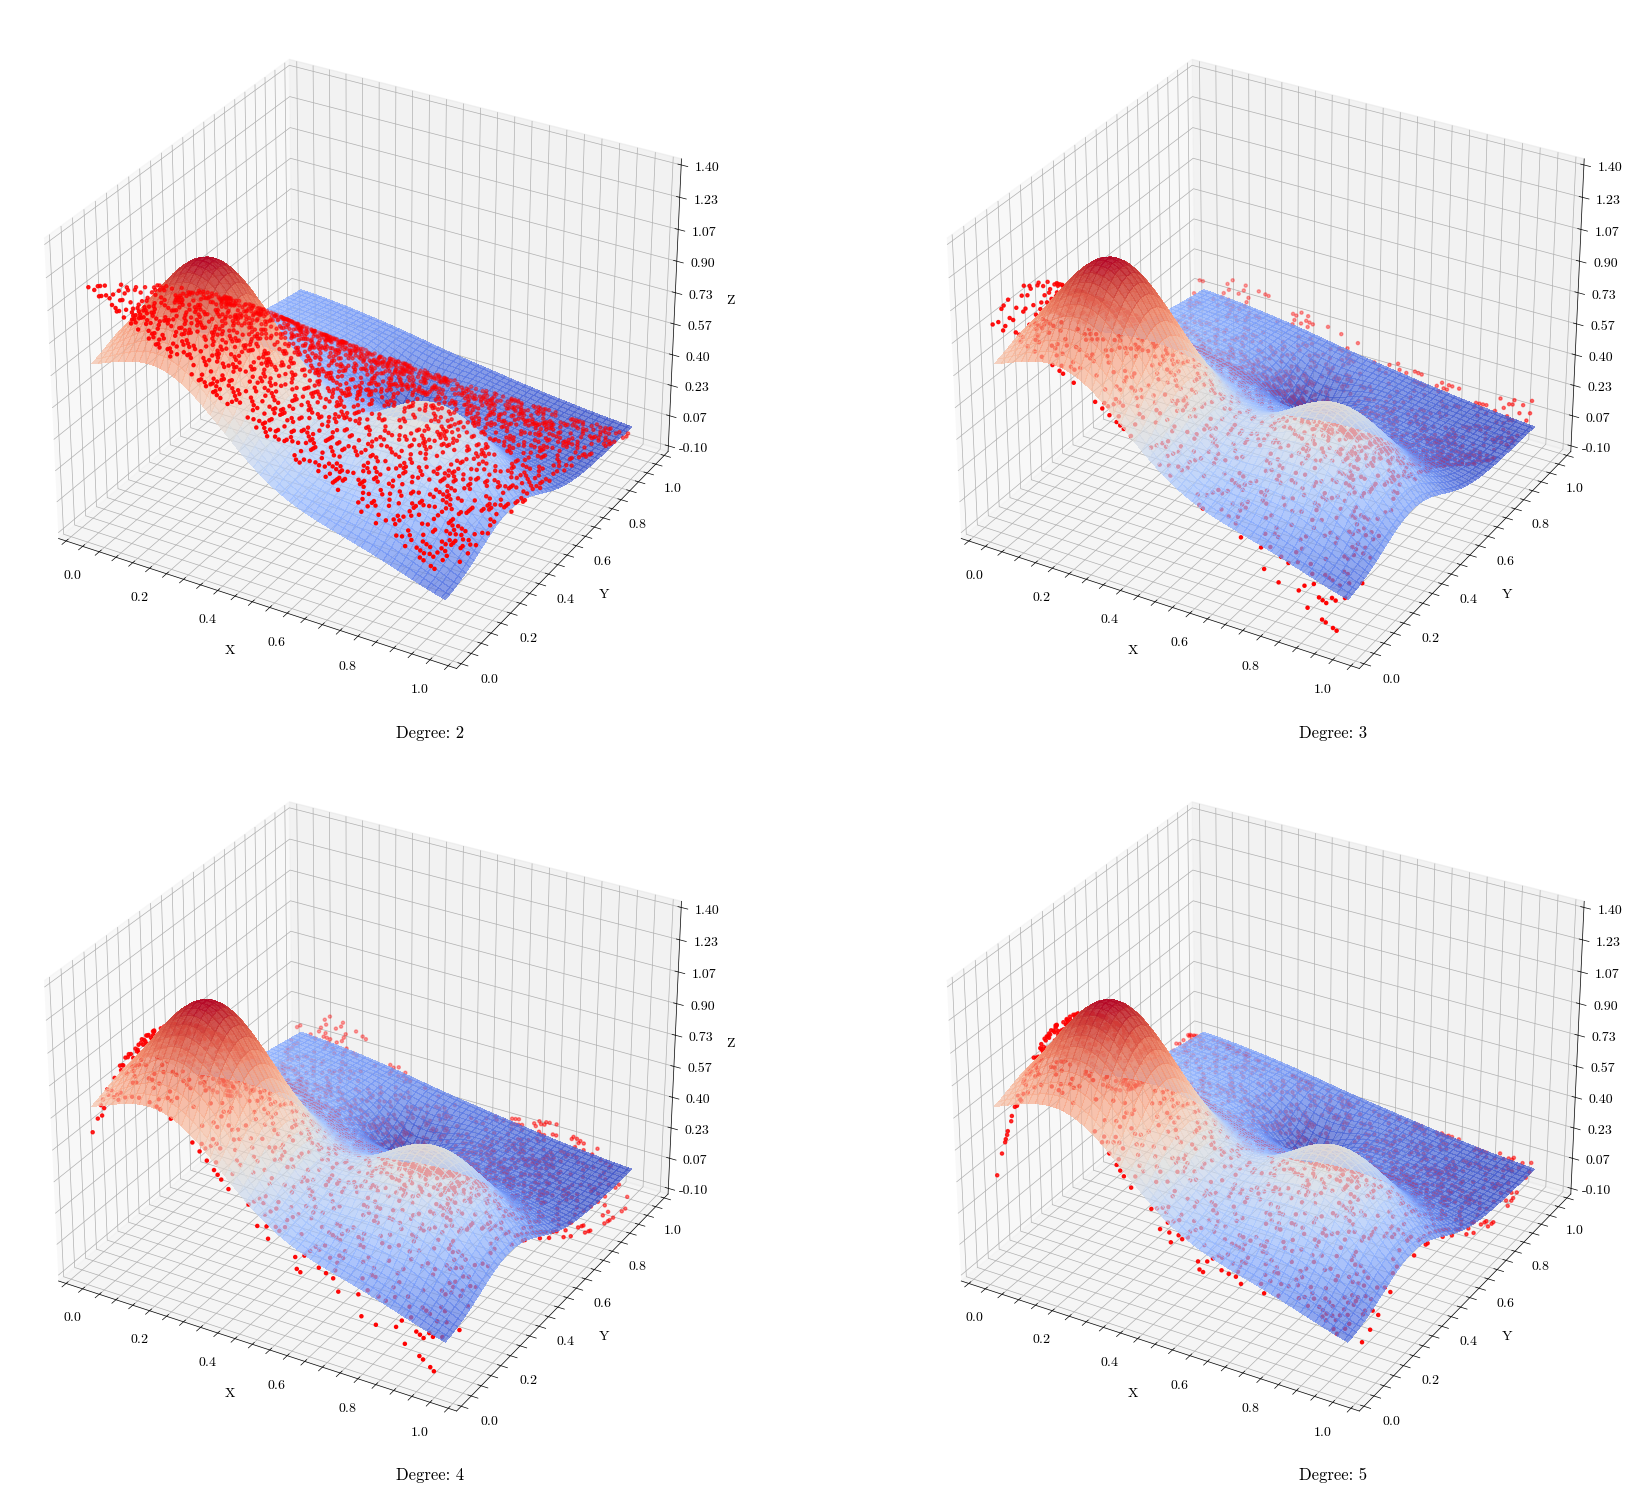

In [208]:

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Set up the figure for subplots
fig = plt.figure(figsize=(20, 15))

# Iterate over degrees from 2 to 5
for degree in range(2, 6):
    # Create a subplot for each degree
    ax = fig.add_subplot(2, 2, degree - 1, projection='3d')
    
    # Create the design matrix and transform the data
    poly = misc.design_matrix(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Perform OLS prediction
    z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)

    # Plot the original Franke function surface
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.7)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    # Add color bar
    #fig.colorbar(surf, shrink=0.2, aspect=5, ax=ax)
    
    # Scatter plot of test predictions
    ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='r', s=5)
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Degree: {degree}', x = 0.60 , y=-0.05)

# Adjust layout
plt.tight_layout()
plt.savefig('figures/franke_ols_fit_multiple_degrees.pdf', transparent=True, bbox_inches='tight')
plt.show()

## With Stochastic Noise N(0,1)

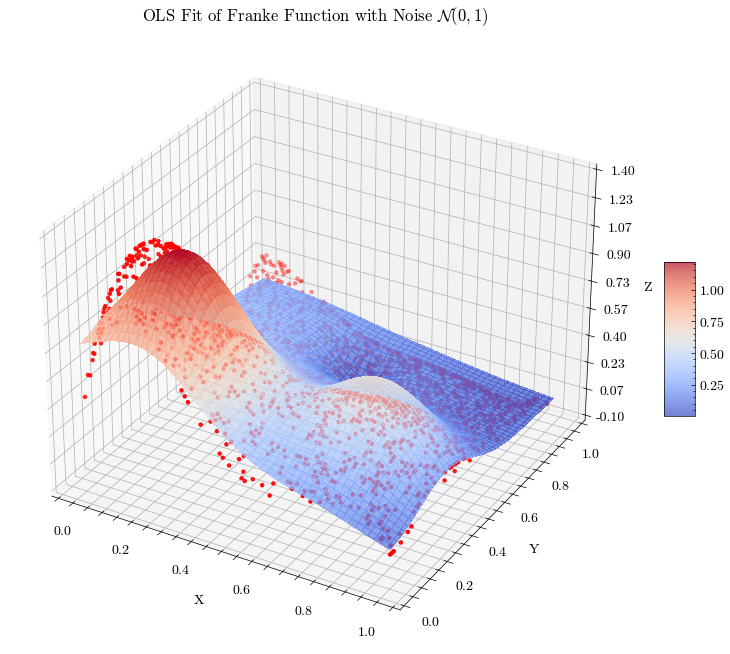

In [209]:
import miscellaneous as misc
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm  # Import cm module
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)
noise = np.random.normal(0, 1, z.shape)  # Create noise
z_noisy = z + noise

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z_noisy.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Lists to store errors and R^2 values
degree = 5
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)

# plot the results

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='r', s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r'OLS Fit of Franke Function with Noise $\mathcal{N}(0,1)$')
plt.savefig('figures/franke_ols_fit_noise.pdf', transparent=True, bbox_inches='tight')

plt.show()

## Absolute Difference between Prediction and Franke function

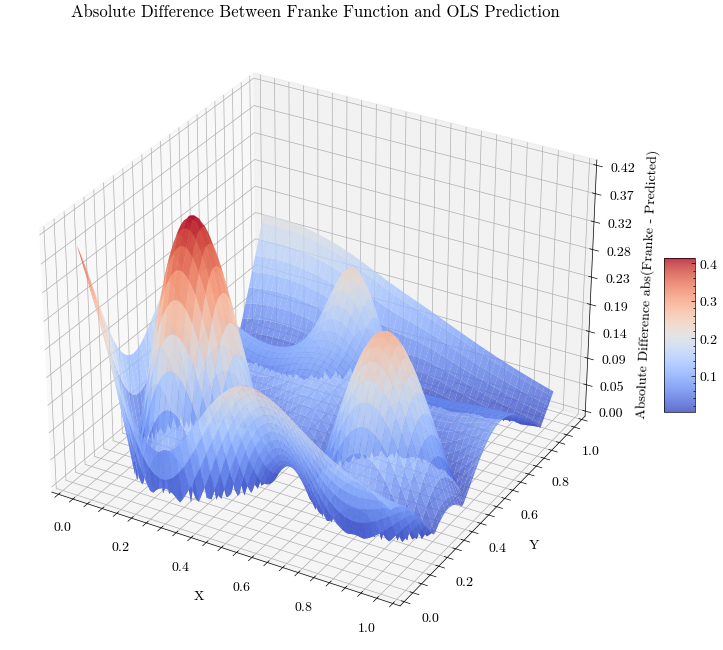

In [210]:
import miscellaneous as misc
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm  # Import cm module
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T  # Flatten x and y to prepare for design matrix
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Polynomial degree for OLS
degree = 2
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# OLS prediction
z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)

# For plotting the difference, we need predictions on the full grid
X_full_poly = poly.transform(X)  # Transform the full grid into polynomial features
z_full_pred = X_full_poly @ beta  # Predict on the full grid

# Reshape predictions to match the grid shape for plotting
z_full_pred_plot = z_full_pred.reshape(x.shape)

# Compute the absolute difference between Franke function and predicted values
z_diff = np.abs(z - z_full_pred_plot)

# Plot the absolute difference
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z_diff, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8)
ax.set_zlim(0, np.max(z_diff))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Absolute Difference abs(Franke - Predicted)')
ax.set_title('Absolute Difference Between Franke Function and OLS Prediction')
plt.savefig('figures/abs_diff_franke_ols_without_noise.pdf', transparent=True, bbox_inches='tight')

plt.show()

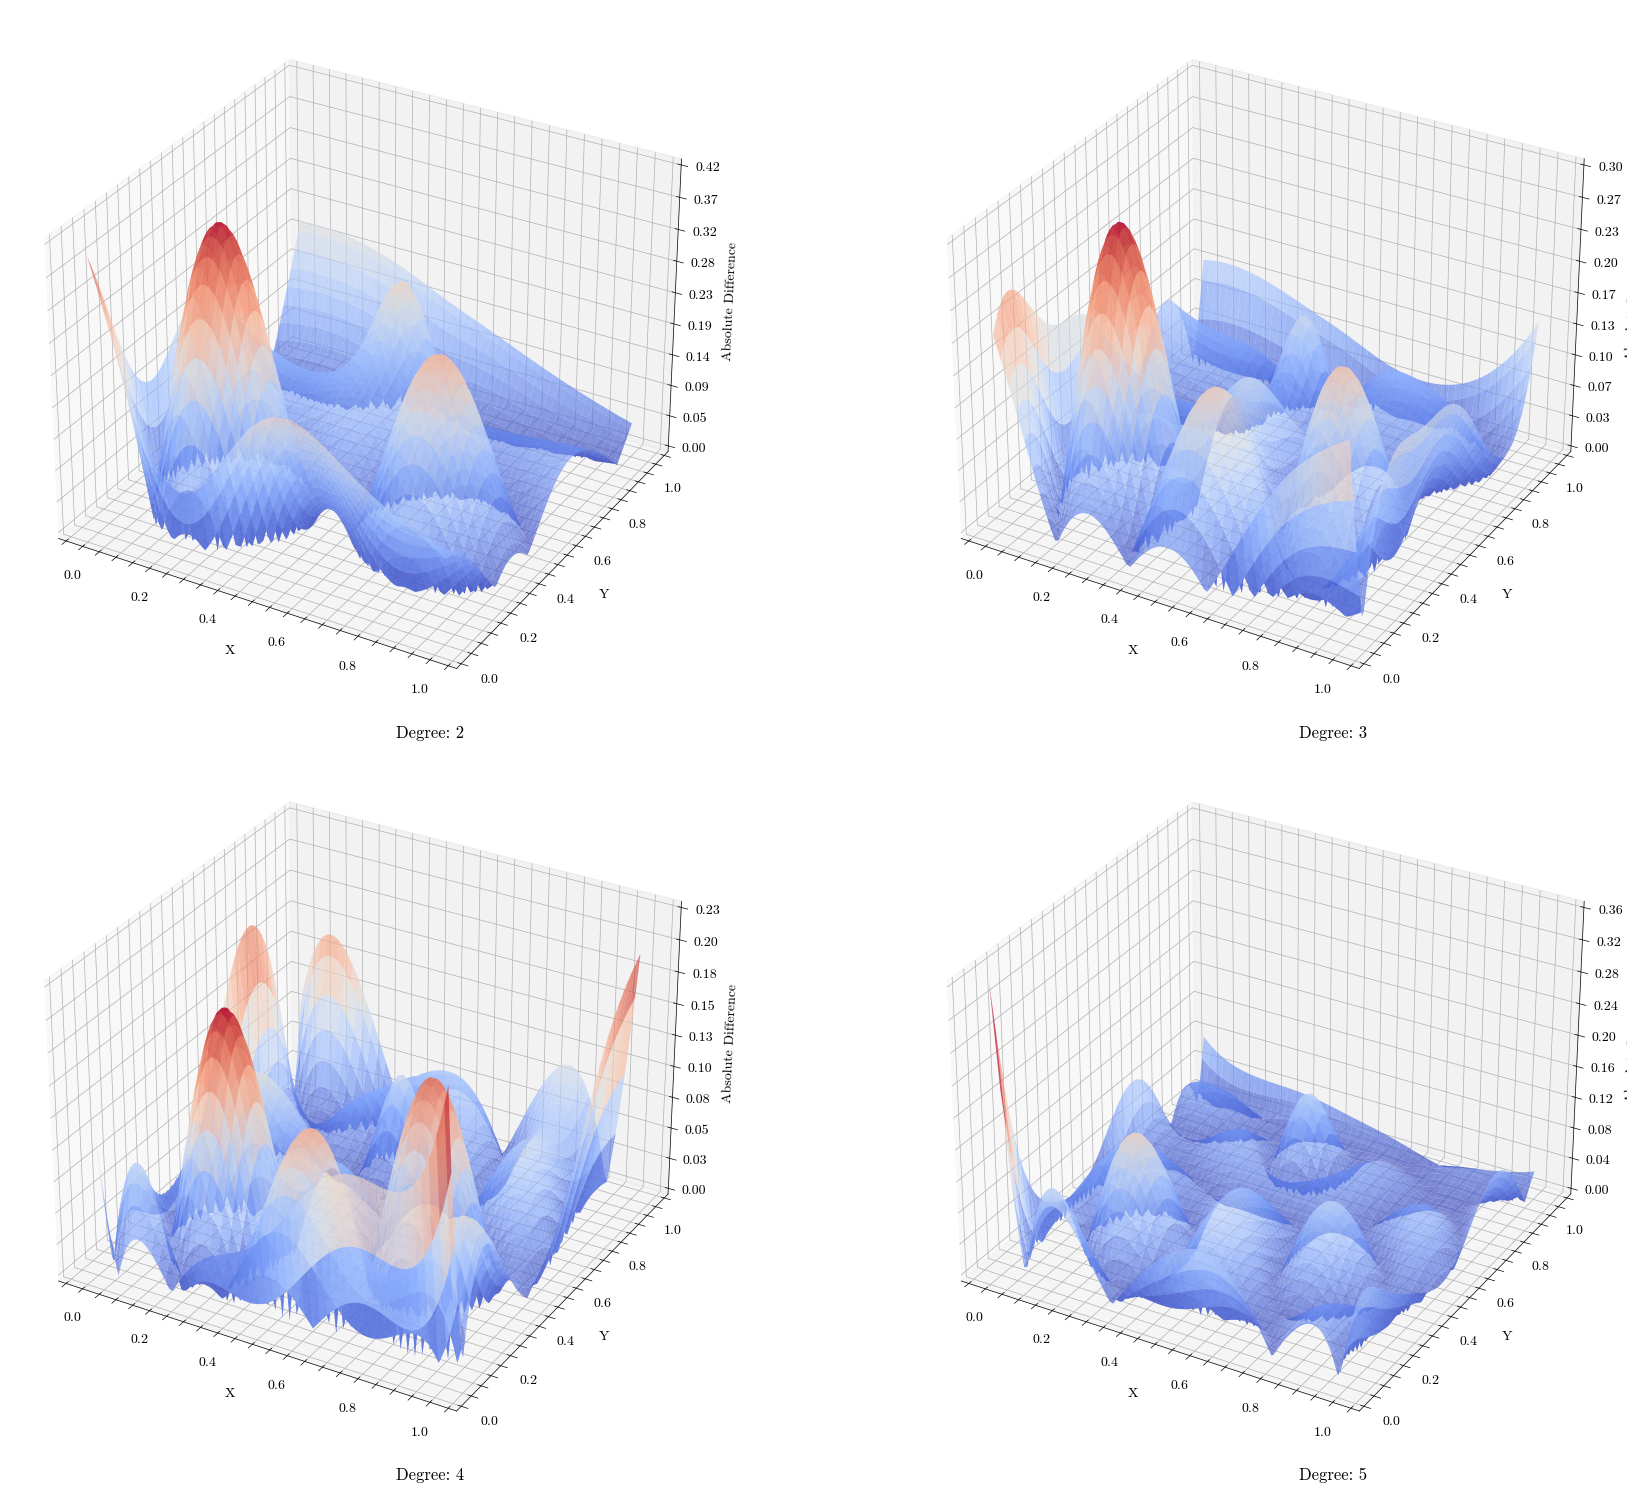

In [211]:
# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Define degrees for the polynomial regression
degrees = [2, 3, 4, 5]
num_degrees = len(degrees)

# Create a grid of subplots
fig = plt.figure(figsize=(20, 15))
axes = fig.subplots(2, 2, subplot_kw={'projection': '3d'})

for idx, degree in enumerate(degrees):
    # Polynomial degree for OLS
    poly = misc.design_matrix(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # OLS prediction
    z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)

    # Transform the full grid into polynomial features
    X_full_poly = poly.transform(X)
    z_full_pred = X_full_poly @ beta

    # Reshape predictions to match the grid shape for plotting
    z_full_pred_plot = z_full_pred.reshape(x.shape)

    # Compute the absolute difference between Franke function and predicted values
    z_diff = np.abs(z - z_full_pred_plot)

    # Select the appropriate subplot based on idx
    ax = axes[idx // 2, idx % 2]
    surf = ax.plot_surface(x, y, z_diff, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.666)
    ax.set_zlim(0, np.max(z_diff))
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    #fig.colorbar(surf, ax=ax, shrink=0.2, aspect=5)
    #ax.set_xlim(1, 0)  # Invert x-axis
    #ax.set_ylim(1, 0)  # Invert y-axis
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Absolute Difference')
    ax.set_title(f'Degree: {degree}',  x = 0.60 , y=-0.05)


# Adjust layout
plt.tight_layout()
plt.savefig('figures/abs_diff_franke_ols_multiple_degrees.pdf', transparent=True, bbox_inches='tight')
plt.show()

## Absolute Difference between Franke and Prediction (With Noise)

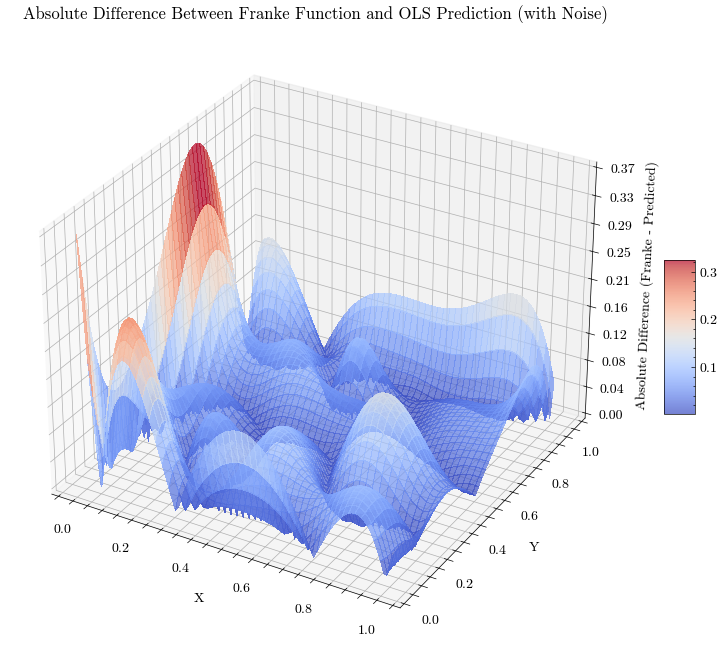

In [212]:
import miscellaneous as misc
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm  # Import cm module
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x,y)
noise = np.random.normal(0, 1, z.shape)  # Create noise
z_noisy = z + noise

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z_noisy.ravel()  # Reshape z to match the shape of X


# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Polynomial degree for OLS
degree = 5
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# OLS prediction
z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)

# For plotting the difference, we need predictions on the full grid
X_full_poly = poly.transform(X)  # Transform the full grid into polynomial features
z_full_pred = X_full_poly @ beta  # Predict on the full grid

# Reshape predictions to match the grid shape for plotting
z_full_pred_plot = z_full_pred.reshape(x.shape)

# Compute the absolute difference between Franke function and predicted values
z_diff = np.abs(z - z_full_pred_plot)

# Plot the absolute difference
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z_diff, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(0, np.max(z_diff))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Absolute Difference (Franke - Predicted)')
ax.set_title('Absolute Difference Between Franke Function and OLS Prediction (with Noise)')
plt.savefig('figures/abs_diff_franke_ols_noise.pdf', transparent=True, bbox_inches='tight')

plt.show()


## Training vs. Test Data - Without Noise

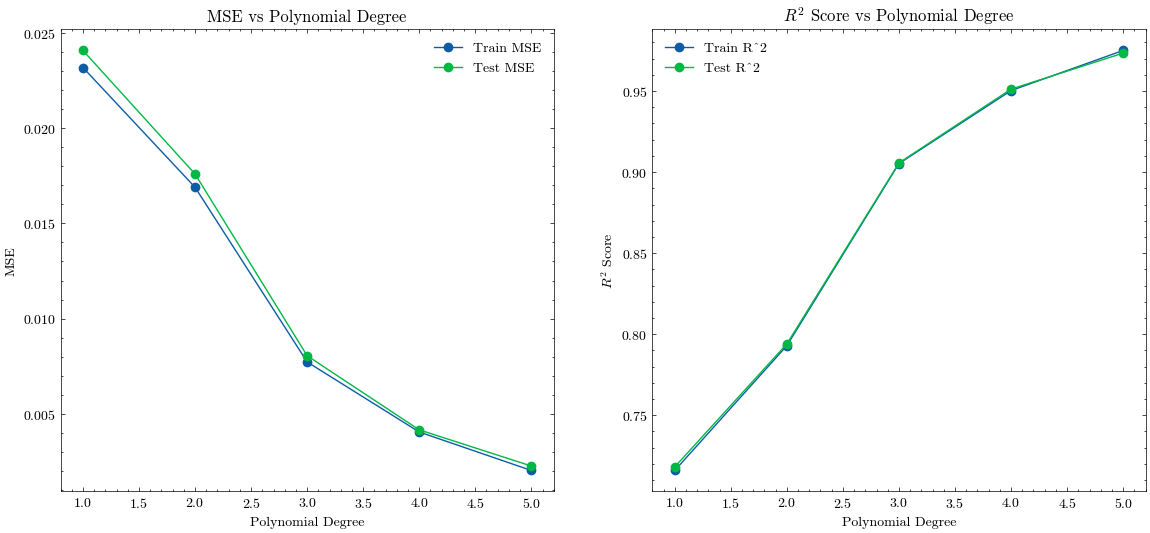

In [213]:
import miscellaneous as misc

import numpy as np
import matplotlib.pyplot as plt
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Lists to store errors and R^2 values
mse_train_list, mse_test_list = [], []
r2_train_list, r2_test_list = [], []
beta_coefficients = []

# Polynomial Regression for degrees 1 to 5

degrees = np.arange(1, 6, 1)

for degree in degrees:
    poly = misc.design_matrix(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)
    
    # Calculate MSE and R^2
    mse_train = misc.mean_squared_error(z_train, z_train_pred)
    mse_test = misc.mean_squared_error(z_test, z_test_pred)
    r2_train = misc.r2_score(z_train, z_train_pred)
    r2_test = misc.r2_score(z_test, z_test_pred)
    
    # Append results to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    beta_coefficients.append(beta)

# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_train_list, label='Train MSE', marker='o')
plt.plot(degrees, mse_test_list, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.legend()

# Plot R^2
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_train_list, label='Train R^2', marker='o')
plt.plot(degrees, r2_test_list, label='Test R^2', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel(r'$R^2$ Score')
plt.title(r'$R^2$ Score vs Polynomial Degree')
plt.legend()
plt.savefig('figures/franke_ols_mse_R2_without_noise.pdf', transparent=True, bbox_inches='tight')


plt.show()

## Parameters beta coefficients vs. complexity

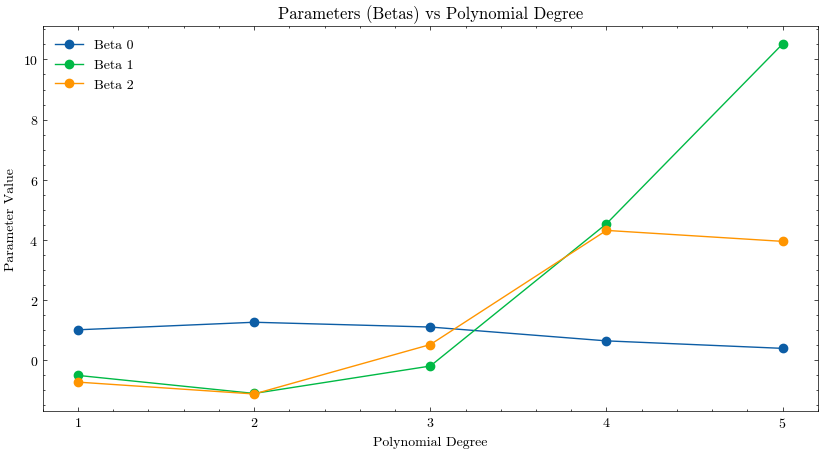

In [241]:
# Plot betas (parameters) for each polynomial degree
plt.figure(figsize=(10, 5))
num_betas = len(beta_coefficients[0])  # Get the number of beta coefficients for the first degree
for i in range(num_betas):  # Loop over the number of parameters
    plt.plot(degrees, [beta_coefficients[degree-1][i] for degree in degrees], marker='o', label=f'Beta {i}')

plt.title("Parameters (Betas) vs Polynomial Degree")
plt.xlabel('Polynomial Degree')
plt.ylabel('Parameter Value')
plt.xticks(degrees)

plt.legend()
plt.savefig('figures/franke_ols_betas_polydegree_without_noise.pdf', transparent=True, bbox_inches='tight')

plt.show()

## Test vs. Training Data with Noise

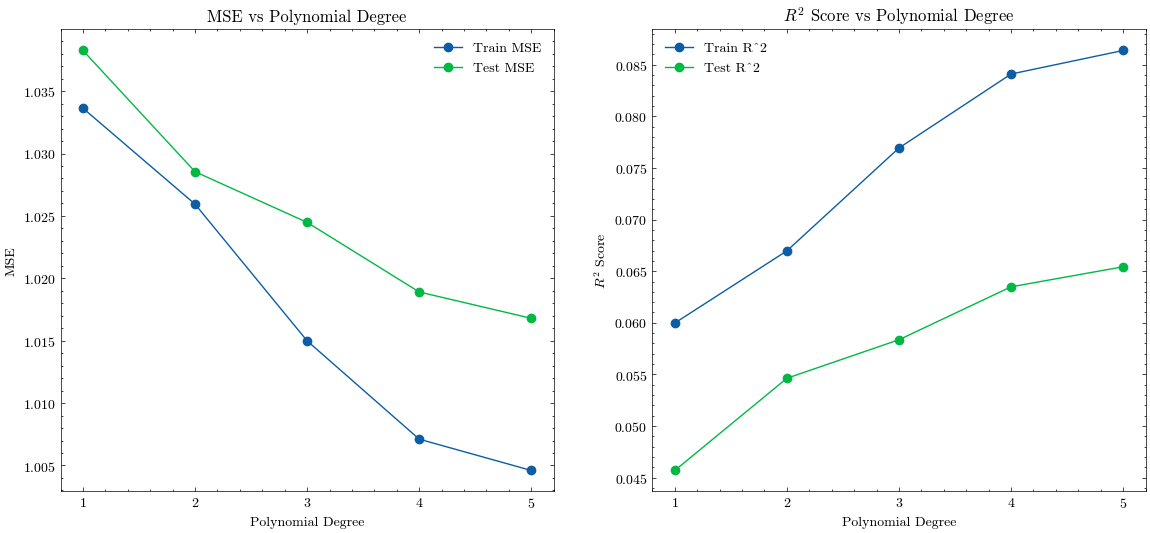

In [240]:
import miscellaneous as misc

import numpy as np
import matplotlib.pyplot as plt
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)
noise = np.random.normal(0, 1, z.shape)  # Create noise
z_noisy = z + noise

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z_noisy.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Lists to store errors and R^2 values
mse_train_list, mse_test_list = [], []
r2_train_list, r2_test_list = [], []
beta_coefficients = []

# Polynomial Regression for degrees 1 to 5

degrees = np.arange(1, 6, 1)

for degree in degrees:
    poly = misc.design_matrix(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    z_test_pred, z_train_pred, beta = misc.ols(X_train_poly, z_train, X_test_poly)
    
    # Calculate MSE and R^2
    mse_train = misc.mean_squared_error(z_train, z_train_pred)
    mse_test = misc.mean_squared_error(z_test, z_test_pred)
    r2_train = misc.r2_score(z_train, z_train_pred)
    r2_test = misc.r2_score(z_test, z_test_pred)
    
    # Append results to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    beta_coefficients.append(beta)

# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_train_list, label='Train MSE', marker='o')
plt.plot(degrees, mse_test_list, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.xticks(degrees)

plt.title('MSE vs Polynomial Degree')
plt.legend()

# Plot R^2
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_train_list, label='Train R^2', marker='o')
plt.plot(degrees, r2_test_list, label='Test R^2', marker='o')
plt.xlabel('Polynomial Degree')
plt.xticks(degrees)
plt.ylabel(r'$R^2$ Score')
plt.title(r'$R^2$ Score vs Polynomial Degree')
plt.legend()
plt.savefig('figures/franke_ols_mse_R2.pdf', transparent=True, bbox_inches='tight')


plt.show()

## Beta coefficient vs. complexity (noise AND clean)

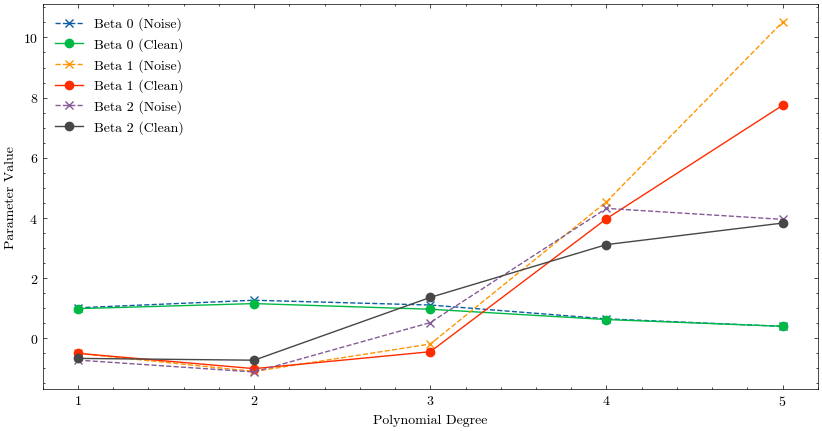

In [216]:

# Generate clean Franke function data
z_clean = misc.FrankeFunction(x, y)

# Prepare the clean data for train-test split
z_clean_data = z_clean.ravel()  # Reshape z_clean to match the shape of X

# Train-Test Split for clean data
X_train_clean, X_test_clean, z_train_clean, z_test_clean = misc.train_test_splitter(X, z_clean_data, test_size=0.2)

# Lists to store beta coefficients for clean data
beta_coefficients_clean = []

# Polynomial Regression for degrees 1 to 5 on clean data
for degree in degrees:
    poly = misc.design_matrix(degree=degree)
    X_train_poly_clean = poly.fit_transform(X_train_clean)
    X_test_poly_clean = poly.transform(X_test_clean)
    
    z_test_pred_clean, z_train_pred_clean, beta_clean = misc.ols(X_train_poly_clean, z_train_clean, X_test_poly_clean)
    
    # Append results to the list
    beta_coefficients_clean.append(beta_clean)

# Plot betas (parameters) for each polynomial degree
plt.figure(figsize=(10, 5))
num_betas = len(beta_coefficients[0])  # Get the number of beta coefficients for the first degree

for i in range(num_betas):  # Loop over the number of parameters
    # Plot with noise
    plt.plot(degrees, [beta_coefficients[degree-1][i] for degree in degrees], marker='x', linestyle='--', label=f'Beta {i} (Noise)')
    
    # Plot without noise
    plt.plot(degrees, [beta_coefficients_clean[degree-1][i] for degree in degrees], marker='o',  label=f'Beta {i} (Clean)')

#plt.title("Parameters (Betas) vs Polynomial Degree")
plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel('Parameter Value')
plt.legend()
plt.savefig('figures/franke_ols_betas_polydegree_noise_vs_clean.pdf', transparent=True, bbox_inches='tight')

plt.show()

# Adding Ridge regression for the Franke function

## Ridge and complexity

<Figure size 1400x600 with 0 Axes>

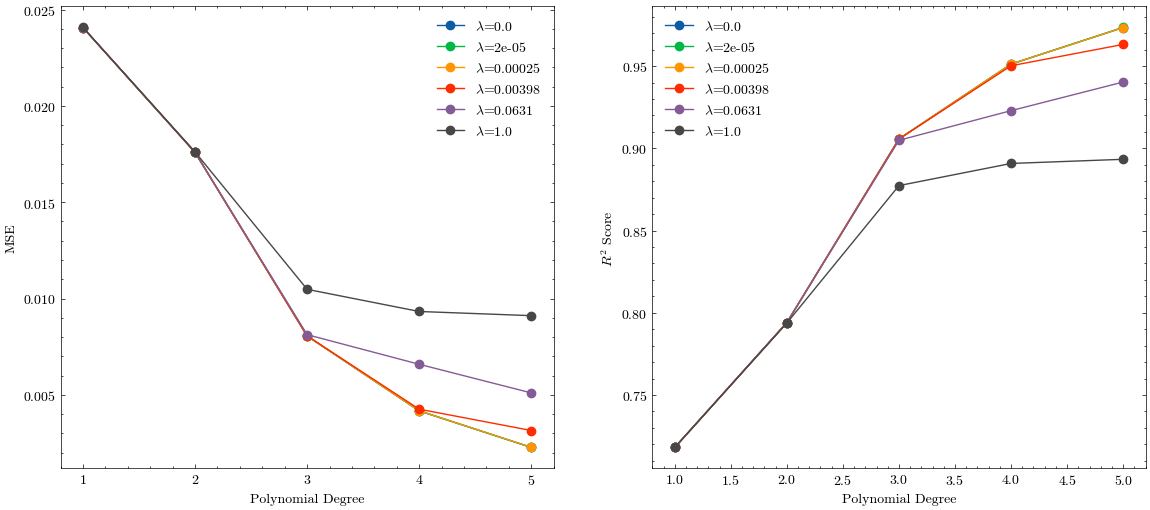

In [217]:
import miscellaneous as misc

import numpy as np
import matplotlib.pyplot as plt
try:
    import scienceplots
    plt.style.use(['science','no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

train_mse, test_mse = {}, {}
train_r2, test_r2 = {}, {}

min_mse = float('inf')
best_lambda_ridge = None

def do_with_lambda(idx: int, lambda_: float):
    # Lists to store errors and R^2 values
    mse_train_list, mse_test_list = [], []
    r2_train_list, r2_test_list = [], []
    beta_coefficients = []

    # Polynomial Regression for degrees 1 to 5

    degrees = np.arange(1, 6, 1)

    for degree in degrees:
        poly = misc.design_matrix(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        z_test_pred, z_train_pred, beta = misc.ridge(X_train_poly, z_train, X_test_poly, lambda_)
        
        # Calculate MSE and R^2
        mse_train = misc.mean_squared_error(z_train, z_train_pred)
        mse_test = misc.mean_squared_error(z_test, z_test_pred)
        r2_train = misc.r2_score(z_train, z_train_pred)
        r2_test = misc.r2_score(z_test, z_test_pred)
        
        # Append results to the lists
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)
        beta_coefficients.append(beta)

        # lambdas 
        global min_mse, best_lambda_ridge
        if mse_test < min_mse:
            min_mse = mse_test
            best_lambda_ridge = lambda_

    train_mse[idx] = mse_train_list
    test_mse[idx] = mse_test_list
    train_r2[idx] = r2_train_list
    test_r2[idx] = r2_test_list

lambdas = np.logspace(-6, 0, 6)

for idx, lambda_ in enumerate(lambdas):
    do_with_lambda(idx, lambda_)

# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))
# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)

for idx, lambda_ in enumerate(lambdas):
    plt.plot(degrees, test_mse[idx], label=f'$\lambda$={round(lambda_, 5)}', marker='o')
plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
#plt.title('Test MSE vs Polynomial Degree')
plt.legend()

# Plot R^2
plt.subplot(1, 2, 2)
for idx, lambda_ in enumerate(lambdas):
    plt.plot(degrees, test_r2[idx], label=f'$\lambda$={round(lambda_, 5)}', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel(r'$R^2$ Score')
#plt.title(r'$R^2$ Score vs Polynomial Degree')
plt.legend()

plt.savefig('figures/franke_ridge_mse_r2.pdf', transparent=True, bbox_inches='tight')
plt.show()


#### Just to check if there is any sign that our models are over-fitting.

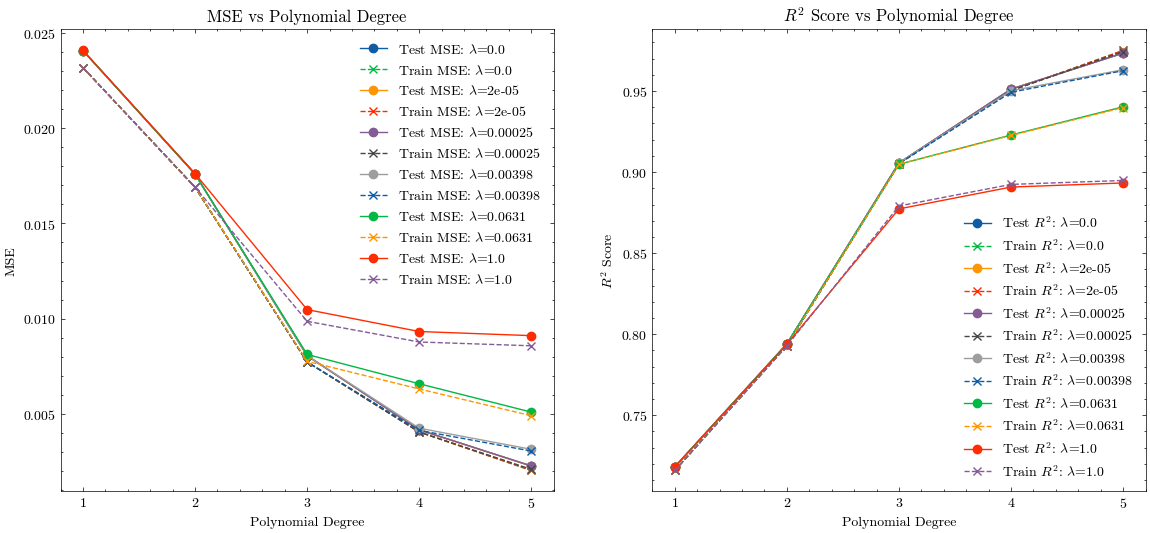

In [218]:
# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
for idx, lambda_ in enumerate(lambdas):
    # Plot test MSE
    plt.plot(degrees, test_mse[idx], label=f'Test MSE: $\lambda$={round(lambda_, 5)}', marker='o')
    # Plot training MSE
    plt.plot(degrees, train_mse[idx], linestyle='--', label=f'Train MSE: $\lambda$={round(lambda_, 5)}', marker='x')

plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)
for idx, lambda_ in enumerate(lambdas):
    # Plot test R²
    plt.plot(degrees, test_r2[idx], label=f'Test $R^2$: $\lambda$={round(lambda_, 5)}', marker='o')
    # Plot training R²
    plt.plot(degrees, train_r2[idx], linestyle='--', label=f'Train $R^2$: $\lambda$={round(lambda_, 5)}', marker='x')

plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel(r'$R^2$ Score')
plt.title(r'$R^2$ Score vs Polynomial Degree')
plt.legend()

#plt.savefig('figures/franke_ridge_mse_r2_with_train.pdf', transparent=True, bbox_inches='tight')
plt.show()


In [219]:
f"{best_lambda_ridge:.6f}"

'0.000016'

## Ridge fit to the franke function

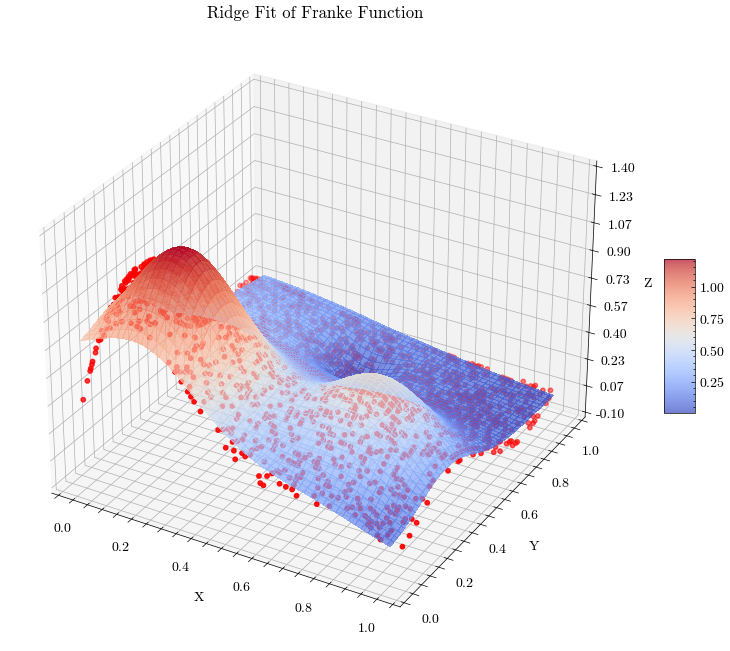

In [220]:
import miscellaneous as misc
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm  # Import cm module
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Set degree for polynomial features and lambda for Ridge regression
degree = 5
lambda_ = best_lambda_ridge

# Polynomial feature transformation
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression fit and prediction
z_test_pred, z_train_pred, beta = misc.ridge(X_train_poly, z_train, X_test_poly, lambda_)

# Plot the true Franke function and Ridge regression prediction

# Create the grid of X values for predictions
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_grid = np.vstack((x_grid.ravel(), y_grid.ravel())).T

# Transform the grid data using the polynomial feature transformation
X_grid_poly = poly.transform(X_grid)

# Predict the z-values on the grid
z_pred = misc.ridge(X_train_poly, z_train, X_grid_poly, lambda_)[0]  # z_pred corresponds to test set predictions

# Reshape predictions to a grid
z_pred_grid = z_pred.reshape(100, 100)

# Plot the true Franke function and the Ridge fit


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='r', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ridge Fit of Franke Function')
plt.savefig('figures/franke_ridge_fit.pdf', transparent=True, bbox_inches='tight')

plt.show()

## Absolute difference Ridge and Franke function

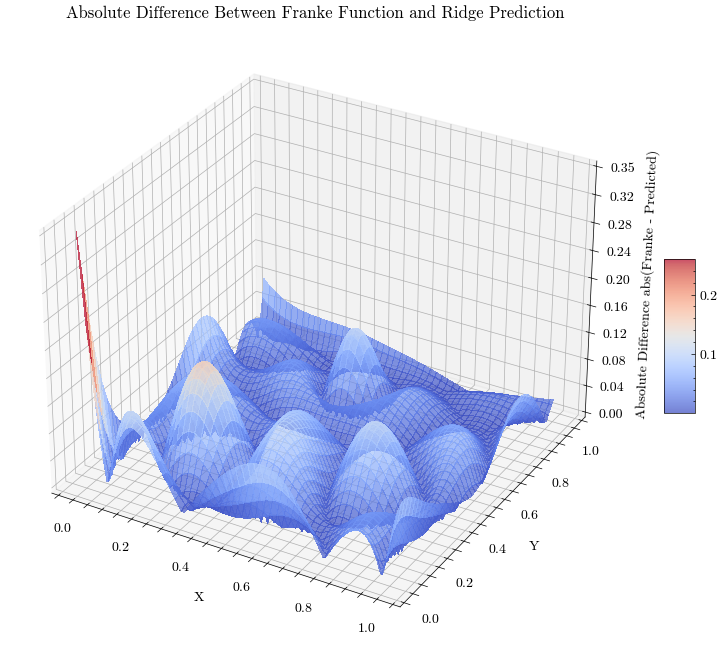

In [221]:
# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T  # Flatten x and y to prepare for design matrix
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Set polynomial degree and lambda for Ridge regression
degree = 5
lambda_ = best_lambda_ridge  

# Polynomial feature transformation
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression fit and prediction
z_test_pred, z_train_pred, beta = misc.ridge(X_train_poly, z_train, X_test_poly, lambda_)

# For plotting the difference, we need predictions on the full grid
X_full_poly = poly.transform(X)  # Transform the full grid into polynomial features
z_full_pred = X_full_poly @ beta  # Predict on the full grid

# Reshape predictions to match the grid shape for plotting
z_full_pred_plot = z_full_pred.reshape(x.shape)

# Compute the absolute difference between Franke function and predicted values
z_diff = np.abs(z - z_full_pred_plot)

# Plot the absolute difference
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z_diff, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(0, np.max(z_diff))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Absolute Difference abs(Franke - Predicted)')
ax.set_title('Absolute Difference Between Franke Function and Ridge Prediction')
plt.savefig('figures/abs_diff_franke_ridge.pdf', transparent=True, bbox_inches='tight')

plt.show()

# Adding Lasso for the Franke function

## Lasso and complexity

/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.07684826897168, tolerance: 0.1956689651551352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.807495951441094, tolerance: 0.1956689651551352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.148007001128065, tolerance: 0.1956689651551352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Librar

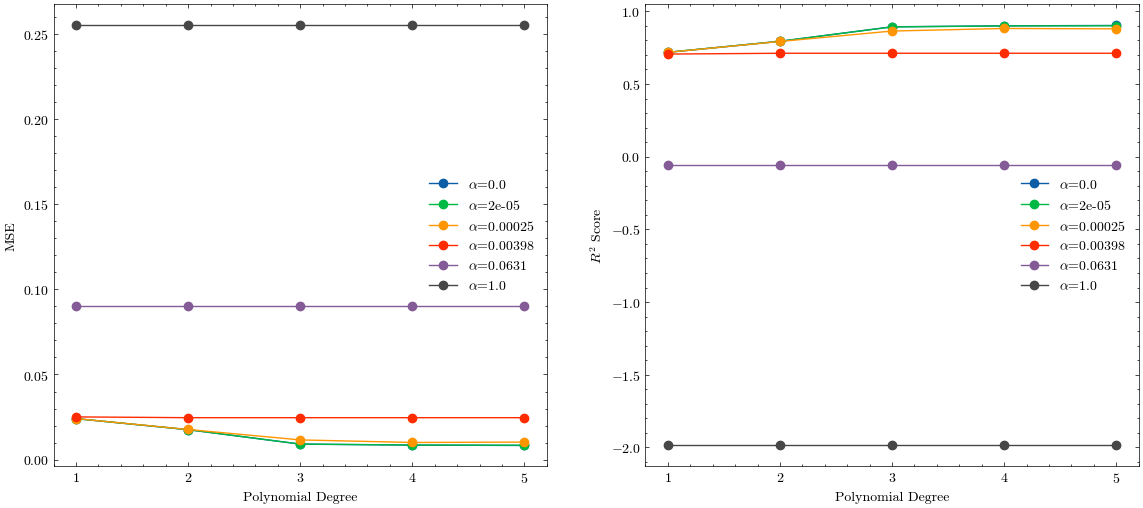

In [222]:
import miscellaneous as misc

import numpy as np
import matplotlib.pyplot as plt
try:
    import scienceplots
    plt.style.use(['science','no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

train_mse, test_mse = {}, {}
train_r2, test_r2 = {}, {}

min_mse = float('inf')
best_alpha_lasso = None

def do_with_alpha(idx: int, alpha: float):
    # Lists to store errors and R^2 values
    mse_train_list, mse_test_list = [], []
    r2_train_list, r2_test_list = [], []
    beta_coefficients = []

    # Polynomial Regression for degrees 1 to 5

    degrees = np.arange(1, 6, 1)

    for degree in degrees:
        poly = misc.design_matrix(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        z_test_pred, z_train_pred, beta = misc.lasso(X_train_poly, z_train, X_test_poly, alpha)
        
        # Calculate MSE and R^2
        mse_train = misc.mean_squared_error(z_train, z_train_pred)
        mse_test = misc.mean_squared_error(z_test, z_test_pred)
        r2_train = misc.r2_score(z_train, z_train_pred)
        r2_test = misc.r2_score(z_test, z_test_pred)
        
        # Append results to the lists
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)
        beta_coefficients.append(beta)
        
        # adding best lasso lambda
        global min_mse, best_alpha_lasso
        if mse_test < min_mse:
            min_mse = mse_test
            best_alpha_lasso = alpha

    train_mse[idx] = mse_train_list
    test_mse[idx] = mse_test_list
    train_r2[idx] = r2_train_list
    test_r2[idx] = r2_test_list

alphas = np.logspace(-6, 0, 6)

for idx, alpha in enumerate(alphas):
    do_with_alpha(idx, alpha)

# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
for idx, alpha in enumerate(alphas):
    plt.plot(degrees, test_mse[idx], label=r'$\alpha$={}'.format(round(alpha, 5)), marker='o')
plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
#plt.title('Test MSE vs Polynomial Degree')
plt.legend()
#plt.savefig('figures/franke_lasso_MSE.pdf', transparent=True, bbox_inches='tight')

#plt.show()

# Plot R^2 as a function of the polynomial degree

#plt.figure(figsize=(14, 6))

# Plot R^2
plt.subplot(1, 2, 2)
for idx, alpha in enumerate(alphas):
    plt.plot(degrees, test_r2[idx], label=r'$\alpha$={}'.format(round(alpha, 5)), marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel(r'$R^2$ Score')
plt.xticks(degrees)
#plt.title(r'$R^2$ Score vs Polynomial Degree')
plt.legend()
plt.savefig('figures/franke_lasso_mse_r2.pdf', transparent=True, bbox_inches='tight')

plt.show()

here as well, just out of curiousity we wanted to see whether test & training performance differs significantly

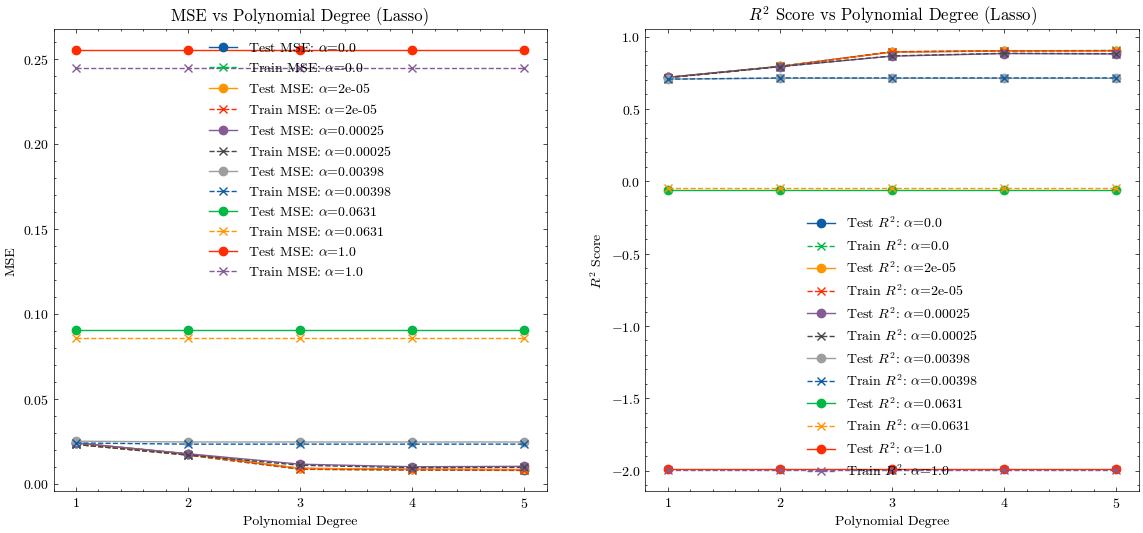

In [223]:
# Plot MSE and R^2 as a function of the polynomial degree
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
for idx, alpha in enumerate(alphas):
    # Plot test MSE
    plt.plot(degrees, test_mse[idx], label=f'Test MSE: $\\alpha$={round(alpha, 5)}', marker='o')
    # Plot training MSE
    plt.plot(degrees, train_mse[idx], linestyle='--', label=f'Train MSE: $\\alpha$={round(alpha, 5)}', marker='x')

plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree (Lasso)')
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)
for idx, alpha in enumerate(alphas):
    # Plot test R²
    plt.plot(degrees, test_r2[idx], label=f'Test $R^2$: $\\alpha$={round(alpha, 5)}', marker='o')
    # Plot training R²
    plt.plot(degrees, train_r2[idx], linestyle='--', label=f'Train $R^2$: $\\alpha$={round(alpha, 5)}', marker='x')

plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel(r'$R^2$ Score')
plt.title(r'$R^2$ Score vs Polynomial Degree (Lasso)')
plt.legend()

# plt.savefig('figures/franke_lasso_mse_r2_with_train.pdf', transparent=True, bbox_inches='tight')
plt.show()

## Lasso Fit for the Franke Function

In [224]:
import miscellaneous as misc
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm  # Import cm module
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    plt.style.use('ggplot')

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Set degree for polynomial features and lambda for Ridge regression
degree = 5
lambda_ = best_alpha_lasso

# Polynomial feature transformation
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lasso regression fit and prediction
z_test_pred, z_train_pred, beta = misc.lasso(X_train_poly, z_train, X_test_poly, lambda_)

# Plot the true Franke function and Lasso regression prediction

# Create the grid of X values for predictions
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_grid = np.vstack((x_grid.ravel(), y_grid.ravel())).T

# Transform the grid data using the polynomial feature transformation
X_grid_poly = poly.transform(X_grid)

# Predict the z-values on the grid
z_pred = misc.ridge(X_train_poly, z_train, X_grid_poly, lambda_)[0]  # z_pred corresponds to test set predictions

# Reshape predictions to a grid
z_pred_grid = z_pred.reshape(100, 100)


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.148007001128065, tolerance: 0.1956689651551352
  model = cd_fast.enet_coordinate_descent_gram(


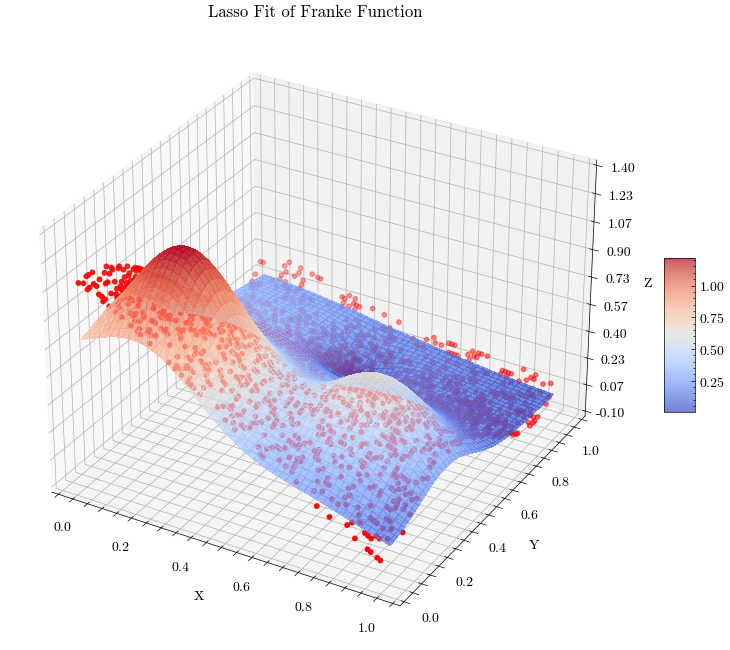

In [225]:
# Plot the true Franke function and the lasso fit

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='r', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lasso Fit of Franke Function')
plt.savefig('figures/franke_lasso_fit.pdf', transparent=True, bbox_inches='tight')

plt.show()

In [226]:
f"{best_alpha_lasso:.6f}"

'0.000001'

## Absolute Difference between Lasso und Franke function

In [227]:
# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)

# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T  # Flatten x and y to prepare for design matrix
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Set polynomial degree and lambda for Ridge regression
degree = 5
lambda_ = best_alpha_lasso  

# Polynomial feature transformation
poly = misc.design_matrix(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression fit and prediction
z_test_pred, z_train_pred, beta = misc.lasso(X_train_poly, z_train, X_test_poly, lambda_)

# For plotting the difference, we need predictions on the full grid
X_full_poly = poly.transform(X)  # Transform the full grid into polynomial features
z_full_pred = X_full_poly @ beta  # Predict on the full grid

# Reshape predictions to match the grid shape for plotting
z_full_pred_plot = z_full_pred.reshape(x.shape)

# Compute the absolute difference between Franke function and predicted values
z_diff = np.abs(z - z_full_pred_plot)

/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.148007001128065, tolerance: 0.1956689651551352
  model = cd_fast.enet_coordinate_descent_gram(


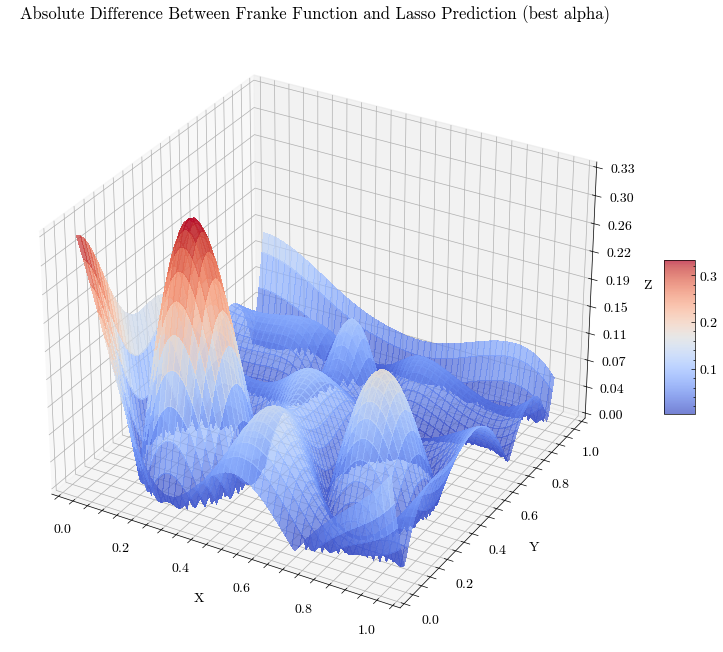

In [228]:
# Plot the absolute difference
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z_diff, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)
ax.set_zlim(0, np.max(z_diff))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.2, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Absolute Difference Between Franke Function and Lasso Prediction (best alpha)')
plt.savefig('figures/abs_diff_franke_lasso.pdf', transparent=True, bbox_inches='tight')

plt.show()

# Bias-variance trade-off and resampling techniques 

## Bootstrapping with OLS 

In [258]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import miscellaneous as misc

# Set parameters
np.random.seed(42)
n_boostraps = 100  # Number of bootstrap samples
maxdegree = 21 # Maximum polynomial degree
degrees = np.arange(1, 21, 1)

# Generate data
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = misc.FrankeFunction(x, y)



# Prepare the data for train-test split
X = np.vstack((x.ravel(), y.ravel())).T
z_data = z.ravel()  # Reshape z to match the shape of X

# Train-Test Split
X_train, X_test, z_train, z_test = misc.train_test_splitter(X, z_data, test_size=0.2)

# Prepare variables for bias-variance analysis

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

# Bias-Variance tradeoff for polynomial degrees
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    z_pred = np.empty((X_test.shape[0], n_boostraps))  # Ensure z_pred matches the shape of z_test
    
    for i in range(n_boostraps):
        x_, y_ = resample(X_train, z_train)  # Resample the training data
        z_pred[:, i] = model.fit(x_, y_).predict(X_test).ravel()  # Predict on the same test data size

    # Store results for error, bias^2, and variance
    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((z_test.reshape(-1, 1) - z_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (z_test.reshape(-1, 1) - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    
    # Output results for each polynomial degree
    print(f'Polynomial degree: {degree}')
    print(f'Error: {error[degree]}')
    print(f'Bias^2: {bias[degree]}')
    print(f'Variance: {variance[degree]}')
    print(f'{error[degree]} >= {bias[degree]} + {variance[degree]} = {bias[degree] + variance[degree]}')


Polynomial degree: 1
Error: 0.024078872529079132
Bias^2: 0.024069976549744014
Variance: 8.8959793351174e-06
0.024078872529079132 >= 0.024069976549744014 + 8.8959793351174e-06 = 0.024078872529079132
Polynomial degree: 2
Error: 0.01760311501967513
Bias^2: 0.01758960916449199
Variance: 1.3505855183140814e-05
0.01760311501967513 >= 0.01758960916449199 + 1.3505855183140814e-05 = 0.01760311501967513
Polynomial degree: 3
Error: 0.008065305712114647
Bias^2: 0.008055919238855042
Variance: 9.386473259605512e-06
0.008065305712114647 >= 0.008055919238855042 + 9.386473259605512e-06 = 0.008065305712114647
Polynomial degree: 4
Error: 0.004175492968563156
Bias^2: 0.004166164194780638
Variance: 9.328773782517879e-06
0.004175492968563156 >= 0.004166164194780638 + 9.328773782517879e-06 = 0.004175492968563155
Polynomial degree: 5
Error: 0.0022779703328489466
Bias^2: 0.0022700053620151304
Variance: 7.964970833815334e-06
0.0022779703328489466 >= 0.0022700053620151304 + 7.964970833815334e-06 = 0.002277970332

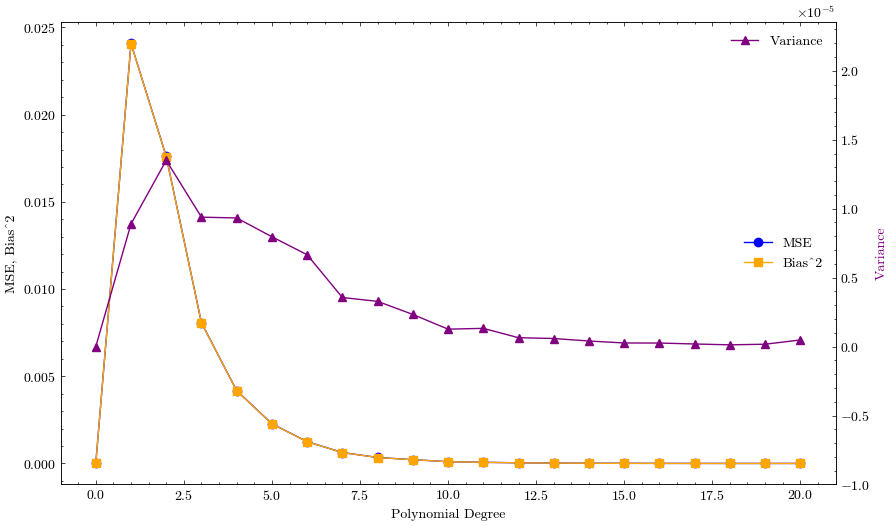

In [259]:
# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for MSE and Bias
ax1.plot(polydegree, error, 'o-', label='MSE', color='blue')
ax1.plot(polydegree, bias, 's-', label='Bias^2', color='orange')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE, Bias^2')
ax1.tick_params(axis='y', labelcolor='black')
# Second y-axis for Variance
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(polydegree, variance, '^-', label='Variance', color='purple')
ax2.set_ylabel('Variance', color='purple')  # Label for second y-axis
ax2.set_ylim([min(variance) - 1e-5, max(variance) + 1e-5])
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# Create legends
ax1.legend(loc='right')
ax2.legend(loc='upper right')

#plt.title('Bias-Variance Tradeoff for OLS Regression')
plt.savefig('figures/franke_ols_bias_variance.pdf', transparent=True, bbox_inches='tight')
plt.show()

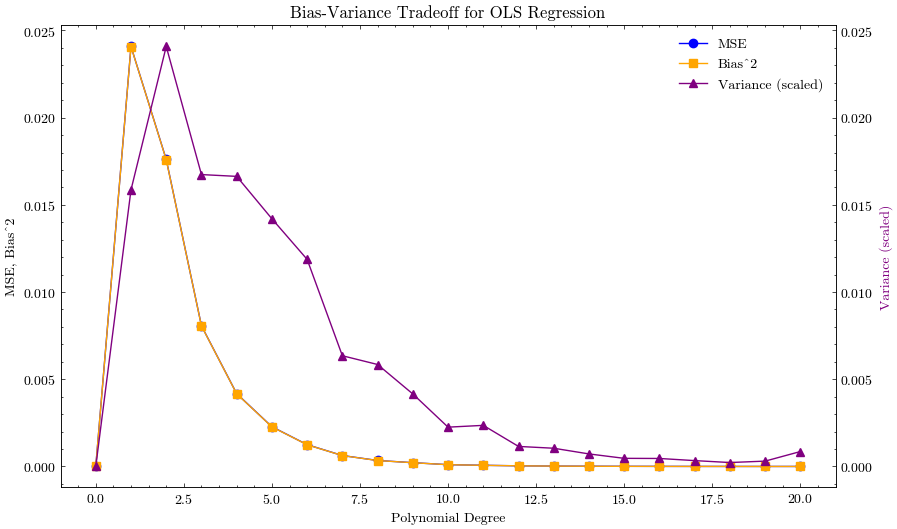

In [260]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming polydegree, error, bias, and variance are already defined

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for MSE and Bias
ax1.plot(polydegree, error, 'o-', label='MSE', color='blue')
ax1.plot(polydegree, bias, 's-', label='Bias^2', color='orange')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE, Bias^2')
ax1.tick_params(axis='y', labelcolor='black')

# Rescale variance to match the scale of MSE and Bias^2
scale_factor = np.max(error) / np.max(variance)
scaled_variance = variance * scale_factor

# Second y-axis for Variance (now scaled)
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(polydegree, scaled_variance, '^-', label='Variance (scaled)', color='purple')
ax2.set_ylabel('Variance (scaled)', color='purple')

# Set y-limit for ax2 to match ax1
ax2.set_ylim(ax1.get_ylim())

# Create legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Bias-Variance Tradeoff for OLS Regression')
plt.savefig('figures/franke_ols_bias_variance_scaled.pdf', transparent=True, bbox_inches='tight')
plt.show()

# Cross-validation as resampling techniques, adding more complexity

In [231]:
from sklearn.model_selection import KFold

# Prepare variables for K-fold cross-validation
degree = 5 
folds_range = range(5, 11)
mse_kfold = np.zeros(len(folds_range))
r2_kfold = np.zeros(len(folds_range))

# K-fold cross-validation
poly = misc.design_matrix(degree=degree)
for j, k_folds in enumerate(folds_range):
    kfold = KFold(n_splits=k_folds)
    scores = np.zeros(k_folds)
    for i, (train_inds, test_inds) in enumerate(kfold.split(X)):
        x_train = X[train_inds]
        z_train = z_data[train_inds]

        x_test = X[test_inds]
        z_test = z_data[test_inds]

        X_train = poly.fit_transform(x_train)
        X_test = poly.fit_transform(x_test)
        z_test_pred, z_train_pred, beta = misc.ols(X_train, z_train, X_test)

        scores[i] = np.sum((z_test_pred - z_test)**2) / np.size(z_train_pred)

    mse_kfold[j] = np.mean(scores)

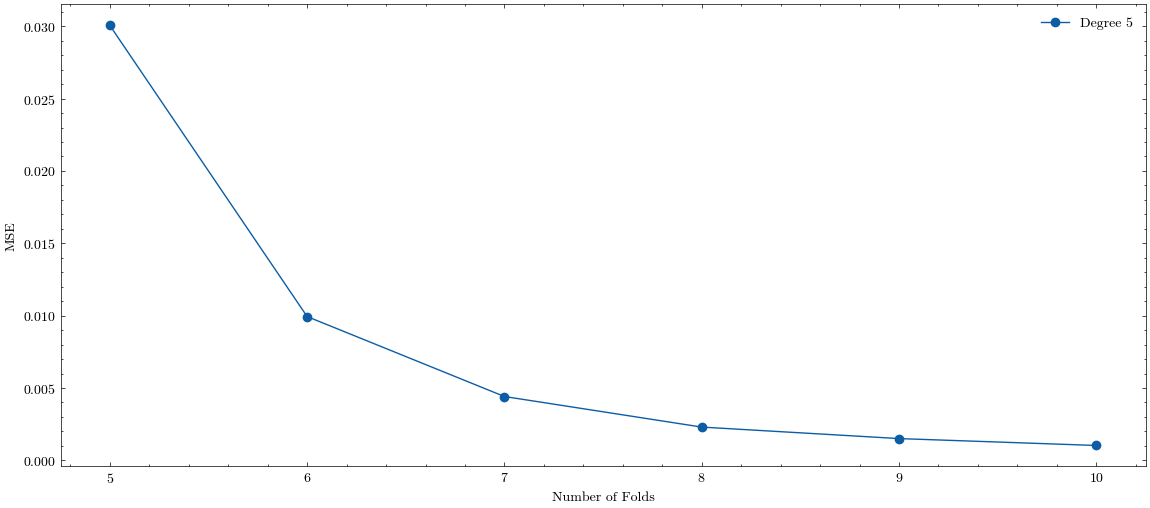

In [232]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(folds_range, mse_kfold, label=f'Degree {degree}', marker='o')

plt.xlabel('Number of Folds')
plt.ylabel('MSE')
#plt.title('OLS K-fold Cross-Validation: MSE vs Number of Folds')
plt.legend()
plt.savefig('figures/franke_kfold_ols.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [233]:
from sklearn.model_selection import KFold
# Prepare variables for K-fold cross-validation
degree_range = range(1, 6)  # Polynomial degrees from 1 to 10
folds_range = range(5, 11)  # K-fold values
mse_kfold = np.zeros((len(degree_range), len(folds_range)))  # MSE for each degree and number of folds
r2_kfold = np.zeros((len(degree_range), len(folds_range)))  # R² values (if needed)

# K-fold cross-validation
for j, k_folds in enumerate(folds_range):
    kfold = KFold(n_splits=k_folds)
    for d_index, degree in enumerate(degree_range):
        poly = misc.design_matrix(degree=degree)  # Create design matrix for the current degree
        scores = np.zeros(k_folds)

        for i, (train_inds, test_inds) in enumerate(kfold.split(X)):
            x_train = X[train_inds]
            z_train = z_data[train_inds]

            x_test = X[test_inds]
            z_test = z_data[test_inds]

            X_train = poly.fit_transform(x_train)
            X_test = poly.fit_transform(x_test)
            z_test_pred, z_train_pred, beta = misc.ols(X_train, z_train, X_test)

            # Calculate MSE for this fold
            scores[i] = np.mean((z_test_pred - z_test) ** 2)  # Calculate MSE for the test set

        mse_kfold[d_index, j] = np.mean(scores)  # Average MSE over all folds


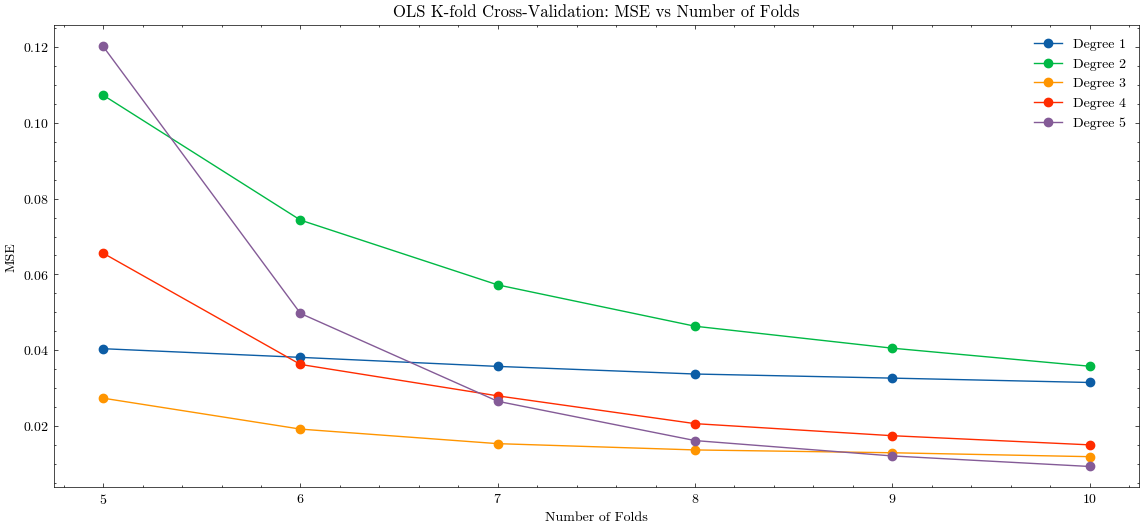

In [234]:
# Plot the results
plt.figure(figsize=(14, 6))

# Loop through each degree and plot the corresponding MSE
for d_index, degree in enumerate(degree_range):
    plt.plot(folds_range, mse_kfold[d_index], label=f'Degree {degree}', marker='o')

plt.xlabel('Number of Folds')
plt.ylabel('MSE')
plt.title('OLS K-fold Cross-Validation: MSE vs Number of Folds')
plt.legend()
plt.savefig('figures/franke_kfold_ols.pdf', transparent=True, bbox_inches='tight')
plt.show()

## Cross validation for lambda

In [235]:
# K-fold cross-validation for Ridge with different lambdas
from sklearn.model_selection import KFold
# Prepare variables for K-fold cross-validation
degree = 5  # Keep the degree constant
folds_range = range(5, 11)
mse_kfold = np.zeros((len(folds_range), len(lambdas)))
r2_kfold = np.zeros((len(folds_range), len(lambdas)))

# K-fold cross-validation
poly = misc.design_matrix(degree=degree)
for j, k_folds in enumerate(folds_range):
    kfold = KFold(n_splits=k_folds)
    for k, lambda_ in enumerate(lambdas):
        scores = np.zeros(k_folds)
        for i, (train_inds, test_inds) in enumerate(kfold.split(X)):
            x_train = X[train_inds]
            z_train = z_data[train_inds]

            x_test = X[test_inds]
            z_test = z_data[test_inds]

            X_train = poly.fit_transform(x_train)
            X_test = poly.fit_transform(x_test)
            z_test_pred, z_train_pred, beta = misc.ridge(X_train, z_train, X_test, lambda_)

            scores[i] = np.sum((z_test_pred - z_test)**2) / np.size(z_train_pred)

        mse_kfold[j, k] = np.mean(scores)
    print(f'Completed {j+1}/{len(folds_range)} folds')


Completed 1/6 folds
Completed 2/6 folds
Completed 3/6 folds
Completed 4/6 folds
Completed 5/6 folds
Completed 6/6 folds


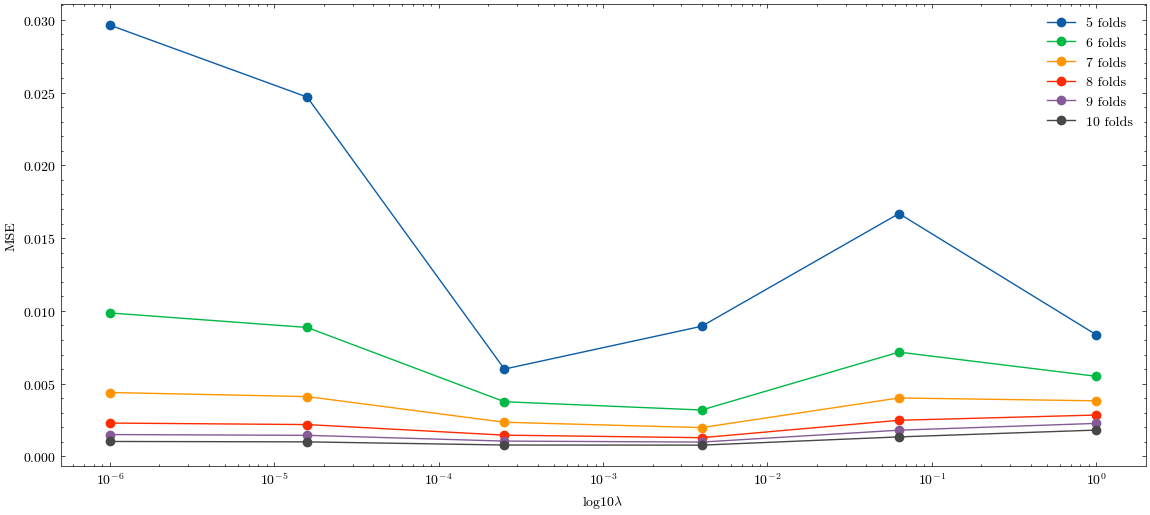

In [236]:
# Plot the results
plt.figure(figsize=(14, 6))
for i in range(len(folds_range)):
    plt.plot(lambdas, mse_kfold[i], label=f'{folds_range[i]} folds', marker='o')

plt.xlabel('log10$\lambda$')
plt.xscale('log')
plt.ylabel('MSE')
#plt.title('Ridge K-fold Cross-Validation: MSE vs $\lambda$')
plt.legend()
plt.savefig('figures/franke_kfold_ridge.pdf', transparent=True, bbox_inches='tight')
plt.show()

# We can see that the best lambda is around 10e0, which is the same as the one we found earlier

## Cross Validaiton for lasso

In [237]:
# K-fold cross-validation for Lasso with different lambdas

from sklearn.model_selection import KFold

# Prepare variables for K-fold cross-validation
degree = 5  # Keep the degree constant
folds_range = range(5, 11)
mse_kfold = np.zeros((len(folds_range), len(alphas)))
r2_kfold = np.zeros((len(folds_range), len(alphas)))

# K-fold cross-validation
poly = misc.design_matrix(degree=degree)
for j, k_folds in enumerate(folds_range):
    kfold = KFold(n_splits=k_folds)
    for k, alpha in enumerate(alphas):
        scores = np.zeros(k_folds)
        for i, (train_inds, test_inds) in enumerate(kfold.split(X)):
            x_train = X[train_inds]
            z_train = z_data[train_inds]

            x_test = X[test_inds]
            z_test = z_data[test_inds]

            X_train = poly.fit_transform(x_train)
            X_test = poly.fit_transform(x_test)
            z_test_pred, z_train_pred, beta = misc.lasso(X_train, z_train, X_test, alpha)

            scores[i] = np.sum((z_test_pred - z_test)**2) / np.size(z_train_pred)

        mse_kfold[j, k] = np.mean(scores)
    print(f'Completed {j+1}/{len(folds_range)} folds')


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.89473614141279, tolerance: 0.156441784410706
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.24037239126975, tolerance: 0.14248112191478854
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.19208777159374, tolerance: 0.21019114800450117
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library

Completed 1/6 folds


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.728840500382745, tolerance: 0.17426197292720236
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.77716342784909, tolerance: 0.15135385868013454
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.00254429572871, tolerance: 0.19518536810205242
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Libr

Completed 2/6 folds


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.879857126027566, tolerance: 0.18551849796375827
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.8300006595589, tolerance: 0.2218340849445111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.5490428559508, tolerance: 0.2374556168434903
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/

Completed 3/6 folds


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.199555095225094, tolerance: 0.19580441303899768
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.30848212899693, tolerance: 0.17726307409532885
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.026214064098586, tolerance: 0.18115415420416037
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Lib

Completed 4/6 folds


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.196861418158726, tolerance: 0.20387168682379353
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.371961960249536, tolerance: 0.18462278228034007
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.374173111642342, tolerance: 0.18379852710756656
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Li

Completed 5/6 folds


/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.28060828639925, tolerance: 0.2094871484420394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.55941163351864, tolerance: 0.19363180057302992
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.62551329595312, tolerance: 0.18768905496865518
  model = cd_fast.enet_coordinate_descent_gram(
/Users/fabianmahner/Librar

Completed 6/6 folds


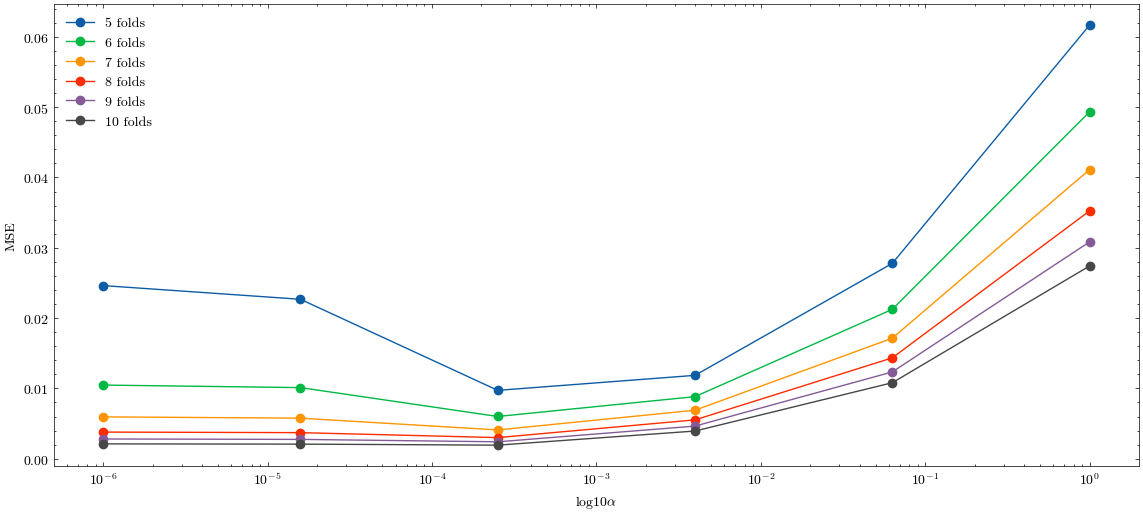

In [238]:
# Plot the results
plt.figure(figsize=(14, 6))
for i in range(len(folds_range)):
    plt.plot(alphas, mse_kfold[i], label=f'{folds_range[i]} folds', marker='o')

plt.xlabel(r'log10$\alpha$')
plt.xscale('log')
plt.ylabel('MSE')
#plt.title(r'Lasso K-fold Cross-Validation: MSE vs $\alpha$')
plt.legend()
plt.savefig('figures/franke_kfold_lasso.pdf', transparent=True, bbox_inches='tight')
plt.show()